In [28]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 102.3/102.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Libraries Import Successfully")

Libraries Import Successfully


In [4]:
datatype={"key": "object","fare_amount" : "float64","pickup_datetime" : "object",
         "pickup_longitude" : "float64","pickup_latitude" : "float64","dropoff_longitude" : "float64",
         "dropoff_latitude" : "float64","passenger_count": "int64"
         }

df_raw = pd.read_csv("train.csv", low_memory=False, nrows=10**5,dtype=datatype,parse_dates=["pickup_datetime"])
df_raw.drop(['key'],axis=1,inplace=True)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
print("shape of dataset :",df_raw.shape)


shape of dataset : (50000, 7)


In [6]:
import calendar

df_raw['pickup_date']=df_raw['pickup_datetime'].dt.date
df_raw['pickup_day']=df_raw['pickup_datetime'].apply(lambda x:x.day)
df_raw['pickup_hor']=df_raw['pickup_datetime'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']=df_raw['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']=df_raw['pickup_datetime'].apply(lambda x:x.month)
df_raw['pickup_year']=df_raw['pickup_datetime'].apply(lambda x:x.year)

df_raw.head()



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hor,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [7]:
#removing Outlier Value
df_raw=df_raw[((df_raw['pickup_longitude'] > -78)&
               (df_raw['pickup_longitude'] < -70))&
              ((df_raw['dropoff_longitude'] > -78)&
               (df_raw['dropoff_longitude'] < -70))&
              ((df_raw['pickup_latitude'] > 37)&
               (df_raw['pickup_latitude'] < 45))&
              ((df_raw['dropoff_latitude'] > 37)&
               (df_raw['dropoff_latitude'] < 45))&
              (df_raw['passenger_count'] > 0)&
              (df_raw['fare_amount'] >= 2.5)]

In [8]:
#Analyse change in Date
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hor,pickup_month,pickup_year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


In [9]:
#checking for NaN Values
df_raw.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hor            0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

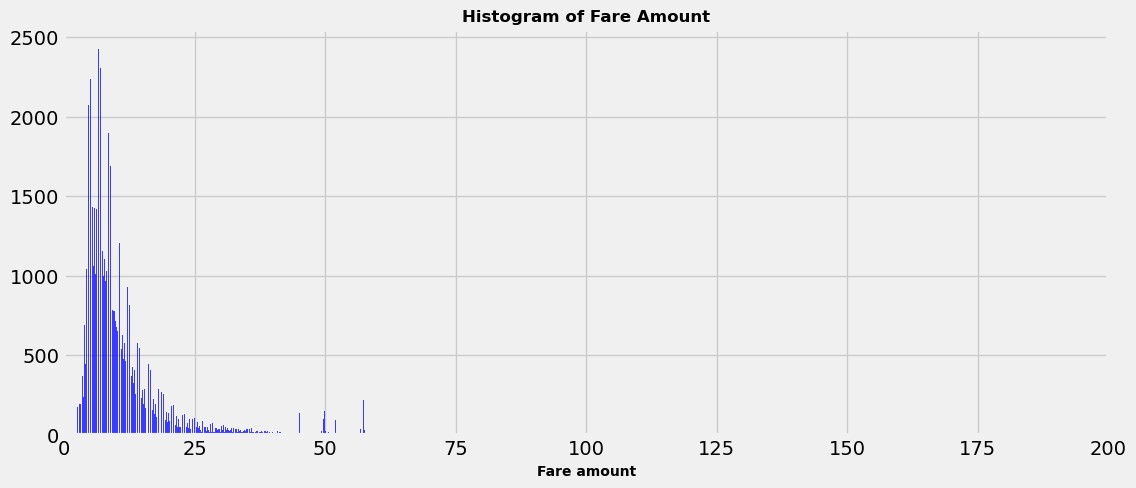

In [10]:
#Visualising target variable
plt.figure(figsize = (12,5))
n, bins, patches = plt.hist(df_raw.fare_amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('Fare amount', fontsize=10,fontweight='bold')
plt.title('Histogram of Fare Amount',fontsize=12,fontweight='bold')
plt.xlim(0,200)
plt.show();

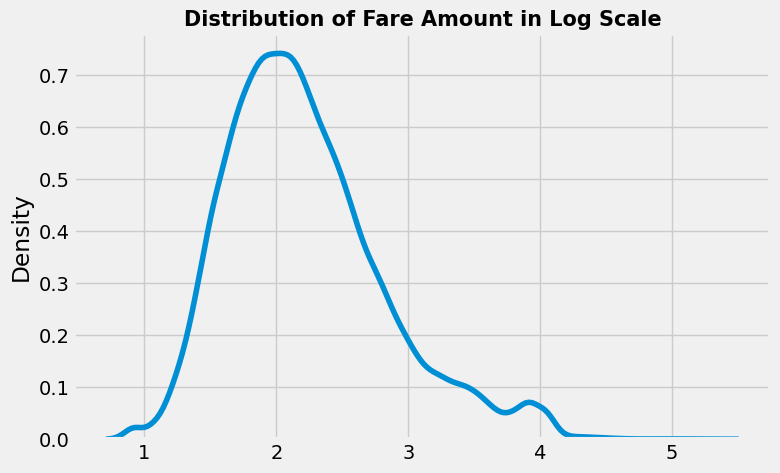

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title(
"Distribution of Fare Amount in Log Scale",fontsize=15,fontweight='bold');

In [12]:
#Analysing Top 5 Fare Amount
df_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: fare_amount, dtype: float64

Text(0, 0.5, 'Count')

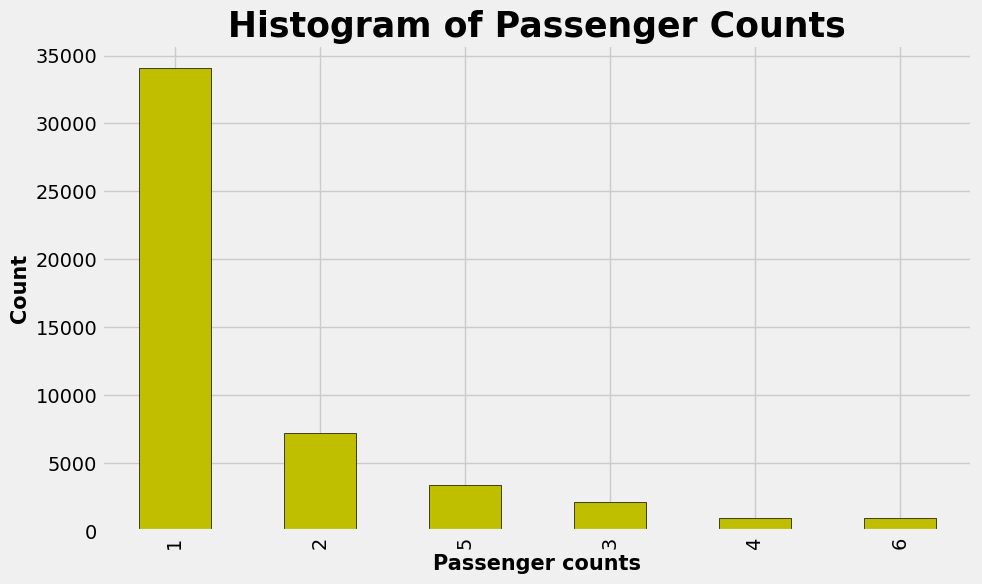

In [13]:
#Passsenger count
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color='y',edgecolor='k');
plt.title('Histogram of Passenger Counts',fontsize=25,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')


Text(0, 0.5, 'Count')

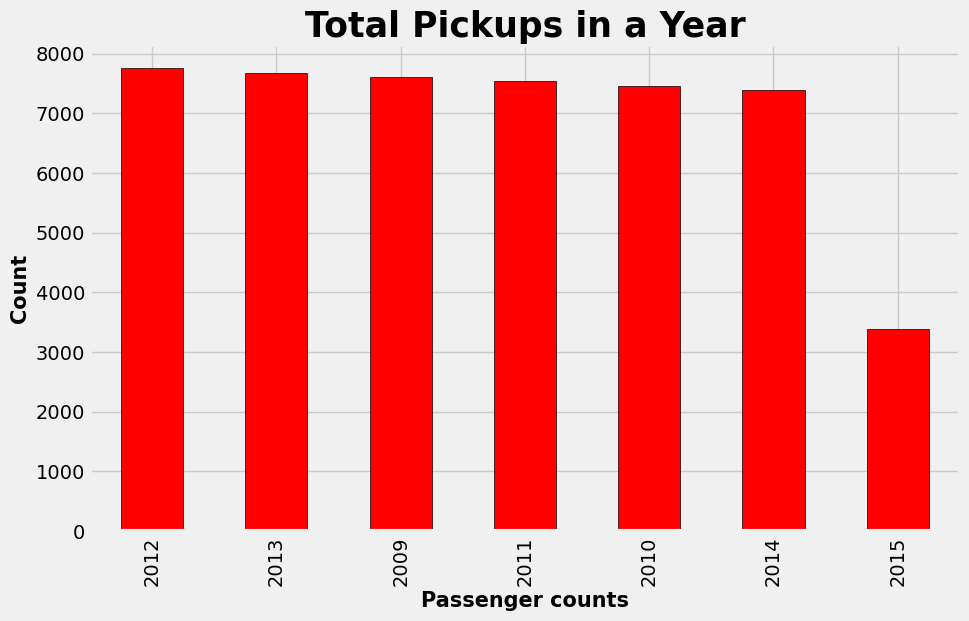

In [14]:
plt.figure(figsize=(10,6))
df_raw['pickup_year'].value_counts().plot.bar(color='r',edgecolor='k');
plt.title('Total Pickups in a Year',fontsize=25,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')


Text(0, 0.5, 'Count')

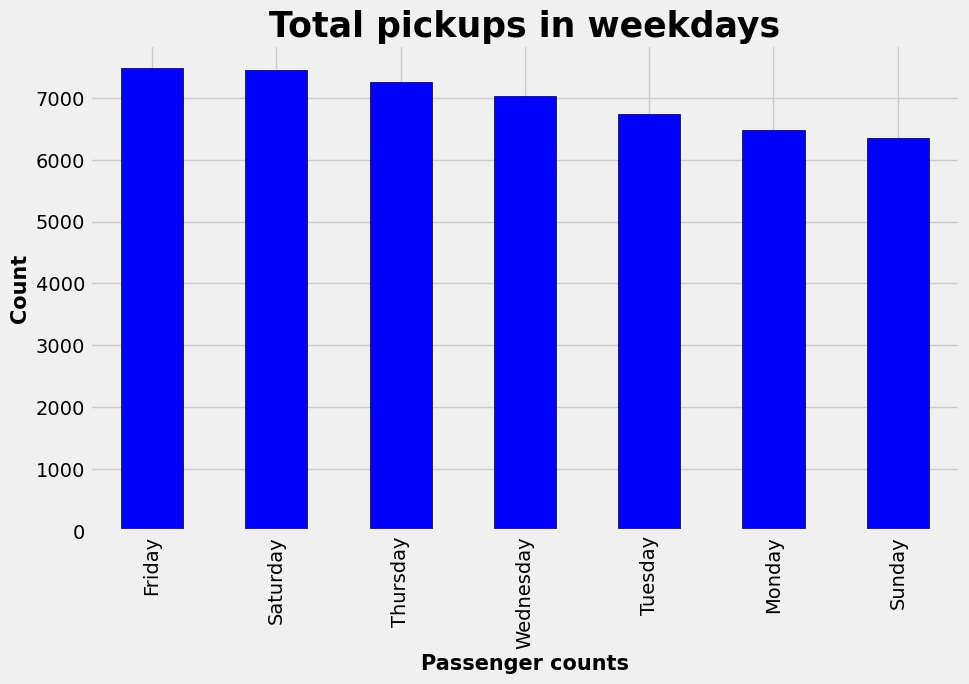

In [15]:
plt.figure(figsize=(10,6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color='b',edgecolor='k');
plt.title('Total pickups in weekdays',fontsize=25,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

In [16]:
df_raw['passenger_count'].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: passenger_count, dtype: int64

(-74.03, -73.75)

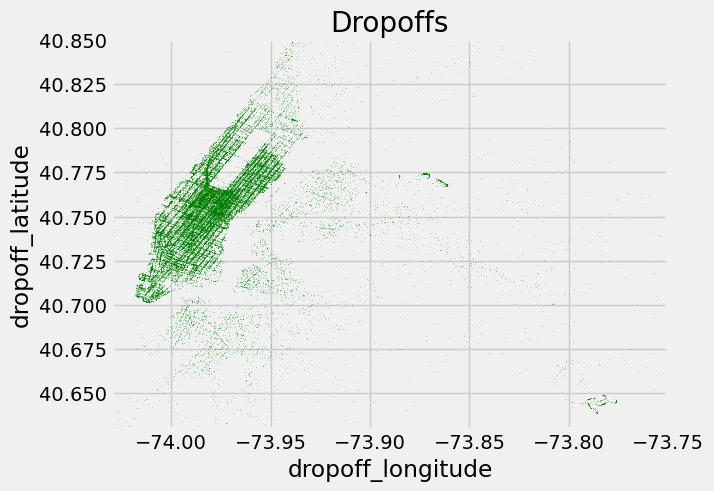

In [17]:
#Plot Heatmap of pickups and dropoffs within New York
city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)

df_raw.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
           color='green',
           s=.02,alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

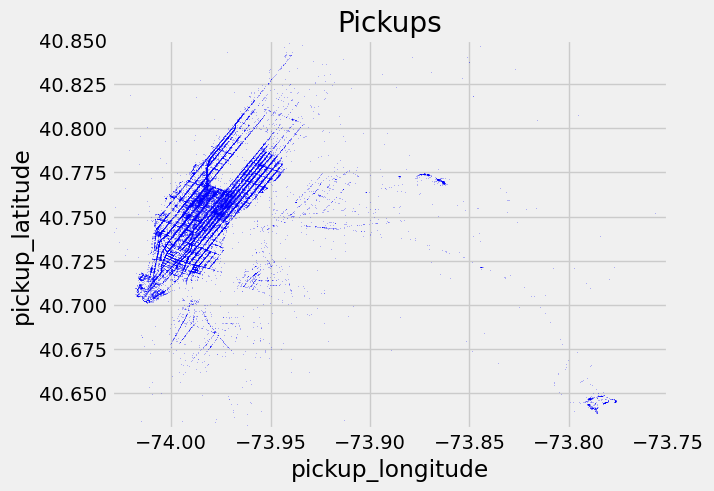

In [18]:
df_raw.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
           color='blue',
           s=.02,alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [19]:
def distance(lat1,lon1,lat2,lon2):
    p=0.0174532925199432295 #pi/180
    a=0.5- np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712*12742*np.arcsin(np.sqrt(a))

#add new column to dataframe with distance in miles
df_raw['distance_miles']=distance(df_raw.pickup_latitude,df_raw.pickup_longitude, \
                                     df_raw.dropoff_latitude,df_raw.dropoff_longitude)

df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hor,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


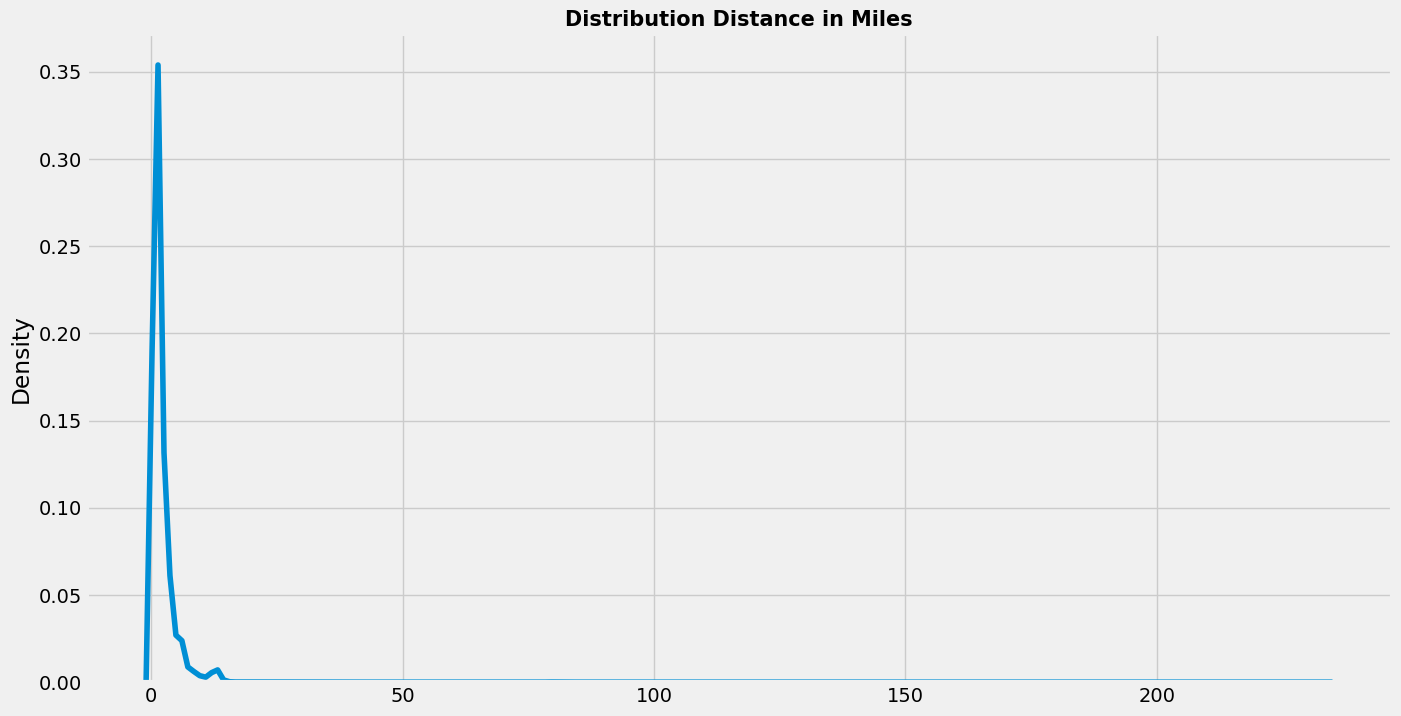

In [20]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['distance_miles'].values).set_title(
    "Distribution Distance in Miles",fontsize=15,fontweight='bold');


In [21]:
import folium
Pickup_Locations= folium.Map(locations=[40.767937,-73.982155],titles='OpenStreetMap',
 zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                       radius=3,
                       color='blue',
                       popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                       fill_color='#FD8A6C'
                       ).add_to(Pickup_Locations)
    
Pickup_Locations

In [24]:
import folium
Drop_off_Locations= folium.Map(locations=[40.767937,-73.982155],titles='OpenStreetMap',
 zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                       radius=3,
                       color='red',
                       popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                       fill_color='#FD8A6C'
                       ).add_to(Drop_off_Locations)
    
Drop_off_Locations

In [25]:
df_final=df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hor,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [26]:
#Imputing Categorical Variables
Variables={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
year={2009:1,2010:2,2011:3,2012:4,2013:5,2014:6,2015:7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_day_of_week']=df_final['pickup_day_of_week'].map(Variables)
df_final.drop(['pickup_datetime','pickup_date'],axis=1,inplace=True)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hor,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242218


In [29]:
from sklearn.model_selection import train_test_split

x=df_final.drop(['fare_amount'],axis=1)
y=df_final[('fare_amount')]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)


Shape of x_train :  (34162, 11)
Shape of x_test :  (14641, 11)
Shape of y_train :  (34162,)
Shape of y_test :  (14641,)


In [32]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE: 8.468


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=5,random_state=0,n_estimators=200)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test,y_pred)**0.5)


Test RMSE: 4.665


In [34]:
#Save the trained model as a pickle string
import pickle
pickle.dump(rf,open('rf','wb'))

In [36]:
import folium
Enter_Coordinates=folium.Map(location=[40.767937,-73.982155],titles='OpenStreetMap',
                            zoom_start=12)
popup=folium.LatLngPopup()
popup=folium.ClickForMarker()

#folium.LatLngPopup().add_to(Enter_Coordinates)
Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [39]:
Pickup_Finder=folium.Map(location=[40.767937,-73.982155],titles='OpenStreetMap',
                        zoom_start=12)
Pickup=[40.744075,-74.003194]
Drop_off=[40.7616,-73.9734]

points=[]
for i in range(len(Pickup)):
    points.append([Pickup[i],Drop_off[i]])
    
print("Distance Between Pickup and Drop-off in miles : ",distance(Pickup[0],Pickup[1],Drop_off[0],Drop_off[1]))


folium.CircleMarker(Pickup,radius=5,color='blue',popup=str([Pickup[0],Pickup[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)

folium.CircleMarker(Drop_off,radius=5,color='red',popup=str([Drop_off[0],Drop_off[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)


for index,lat in enumerate(Pickup):
    folium.Marker([lat,
                  Drop_off[index]],
                 icon=folium.Icon(color='green',icon='plus')).add_to(Pickup_Finder)
    
folium.PolyLine([Pickup,Drop_off],color='green',weight=3,opacity=5).add_to(Pickup_Finder)


Pickup_Finder


Distance Between Pickup and Drop-off in miles :  1.974337688099293


In [43]:
print('Enter Your information to Predict Fare : ')

Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_off_Coordinates=str(input("Enter Drop-off Coordinates : "))

pickup_latitude=float(Pickup_Coordinates.split(',')[0])
pickup_longitude=float(Pickup_Coordinates.split(',')[1])

dropoff_latitude=float(Drop_off_Coordinates.split(',')[0])
dropoff_longitude=float(Drop_off_Coordinates.split(',')[1])


Enter_Date=input("Enter Date (DD/MM/YYYY)")

passenger_count=int(input('Enter Number of paassenger: '))

pickup_day=int(Enter_Date.split('/')[0])
pickup_hour=int(input('Enter Hour: '))

pickup_day_of_week=int(input('Enter Week: '))

pickup_month=int(Enter_Date.split('/')[1])

pickup_year=int(Enter_Date.split('/')[2])

distance_miles=distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)

my_array=np.array([pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,
                 passenger_count,pickup_day,pickup_hour,
                 pickup_day_of_week,pickup_month,pickup_year,distance_miles])

print('Fare Amount ($) :',rf.predict(my_array.reshape(1,-1)))


Enter Your information to Predict Fare : 
Enter Pickup Coordinates : 45.26,67.14
Enter Drop-off Coordinates : 56.15,71.35
Enter Date (DD/MM/YYYY)14/03/2015
Enter Number of paassenger: 4
Enter Hour: 2
Enter Week: 3
Fare Amount ($) : [53.17966733]
